<a href="https://colab.research.google.com/github/pedrodeparis/Classification-Models---Machine-Learning/blob/main/Desafio_6_Classification_Model_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Etapa 01) Análise exploratória dos dados (Data Understanding)

In [2]:
df = pd.read_csv("streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [3]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [5]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64



## Etapa 02) Tratamento dos Dados (Data Preparation)

In [6]:
colunas = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[colunas] = df[colunas].fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        77884 non-null  float64
 3   Devices_connected       77884 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              77884 non-null  float64
 8   Churned                 77884 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [8]:
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [9]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

<ipython-input-9-e2638a3c07ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


In [11]:
df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']].astype(int)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Avg_rating
0,49,4700,3,0,0
1,69,6107,2,0,2
2,44,6374,3,1,1
3,26,0,5,0,0
5,54,3024,2,0,0
...,...,...,...,...,...
77879,45,0,0,0,2
77880,47,6176,0,0,4
77881,64,0,5,0,4
77882,58,1314,5,0,0


In [12]:
df['Subscription_type'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Premium     12224
Standard    12157
Basic       12134
Name: Subscription_type, dtype: int64>

In [13]:
df['Churned'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of No     29459
Yes     7056
Name: Churned, dtype: int64>

In [14]:
X = df.drop(columns=["User_id", "Churned"], axis = 1)

y = df[["Churned"]]

In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le = LabelEncoder()
le.fit(y.Churned)
y.Churned = le.transform(y.Churned)


<ipython-input-16-74d363f79e6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churned = le.transform(y.Churned)


In [17]:
X = pd.get_dummies(X)

In [18]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()

X = pd.DataFrame(mn.fit_transform(X))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train.values.ravel())

In [21]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
cm = confusion_matrix(y_test, lr.predict(X_test))

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (36515).

<Figure size 1000x1000 with 0 Axes>

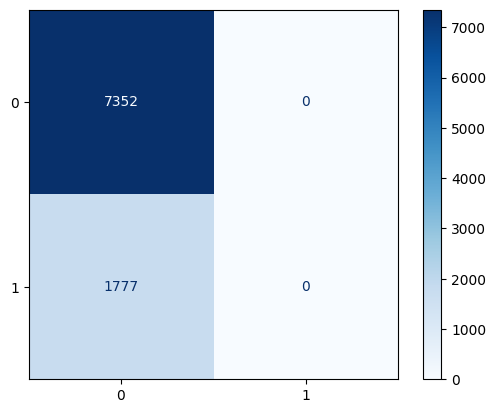

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df.Churned)
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
print(f"Acurácia(Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia(Teste): {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")

print(f"Precisão(Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precisão (Teste): {precision_score(y_test, lr.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")

print(f"f1 (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"f1 (Teste): {f1_score(y_test, lr.predict(X_test))}")

print(f"roc_auc_score (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [ ]:
rf.fit(X_train, y_train.values.ravel())


In [ ]:
rf.predict(X_test)


In [ ]:
print(f"Acurácia(Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia(Teste): {accuracy_score(y_test, rf.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")

print(f"Precisão(Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precisão (Teste): {precision_score(y_test, rf.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")

print(f"f1 (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"f1 (Teste): {f1_score(y_test, rf.predict(X_test))}")

print(f"roc_auc_score (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [1,2,3,4,5,6,7,8,9,10],
             "n_estimators": [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring="accuracy", cv=5, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)


In [ ]:
grid_search.best_estimator_.get_params()


In [ ]:
rf_tunned = RandomForestClassifier(
bootstrap = True,
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 5,
max_features = 'sqrt',
max_leaf_nodes = None,
max_samples = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
n_estimators = 100,
n_jobs = None,
oob_score = False,
random_state = None,
verbose = 0,
warm_start = False)

rf_tunned

In [ ]:
rf_tunned.fit(X_train, y_train.values.ravel())


In [ ]:
rf_tunned.predict(X_test)


In [ ]:
print(f"Acurácia(Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia(Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Precisão(Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precisão (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")

print(f"f1 (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"f1 (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")

print(f"roc_auc_score (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")